In [177]:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


import warnings
warnings.filterwarnings("ignore")


# Import data

In [245]:
df = pd.read_csv('E0 - All In One - E0.csv')

In [179]:
df.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,E0,13/08/11,Blackburn,Wolves,1,2,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,13/08/11,Fulham,Aston Villa,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,13/08/11,Liverpool,Sunderland,1,1,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,13/08/11,Newcastle,Arsenal,0,0,D,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,13/08/11,QPR,Bolton,0,4,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df.shape

(3420, 105)

<AxesSubplot:>

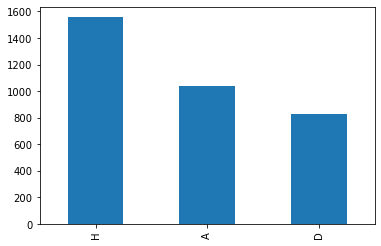

In [125]:
df.FTR.astype(str).value_counts().plot(kind='bar')

# Data Cleaning

In [180]:
FTR = df.FTR
FTR

0       A
1       D
2       D
3       D
4       A
       ..
3415    A
3416    H
3417    A
3418    H
3419    D
Name: FTR, Length: 3420, dtype: object

In [251]:
#Taking the odds that we can find on recent matches

#df_recentmatches = pd.read_csv('recentmatches.csv')
#features = list(df_recentmatches.iloc[:,24:42].columns)

df = df[features]

In [252]:
df.insert(0, 'FTR', FTR)

In [250]:
df.dropna(inplace= True)

# Feature Selection

In [258]:
df.FTR.replace({'H': 0, 'D': 1, 'A': 2}, inplace=True)

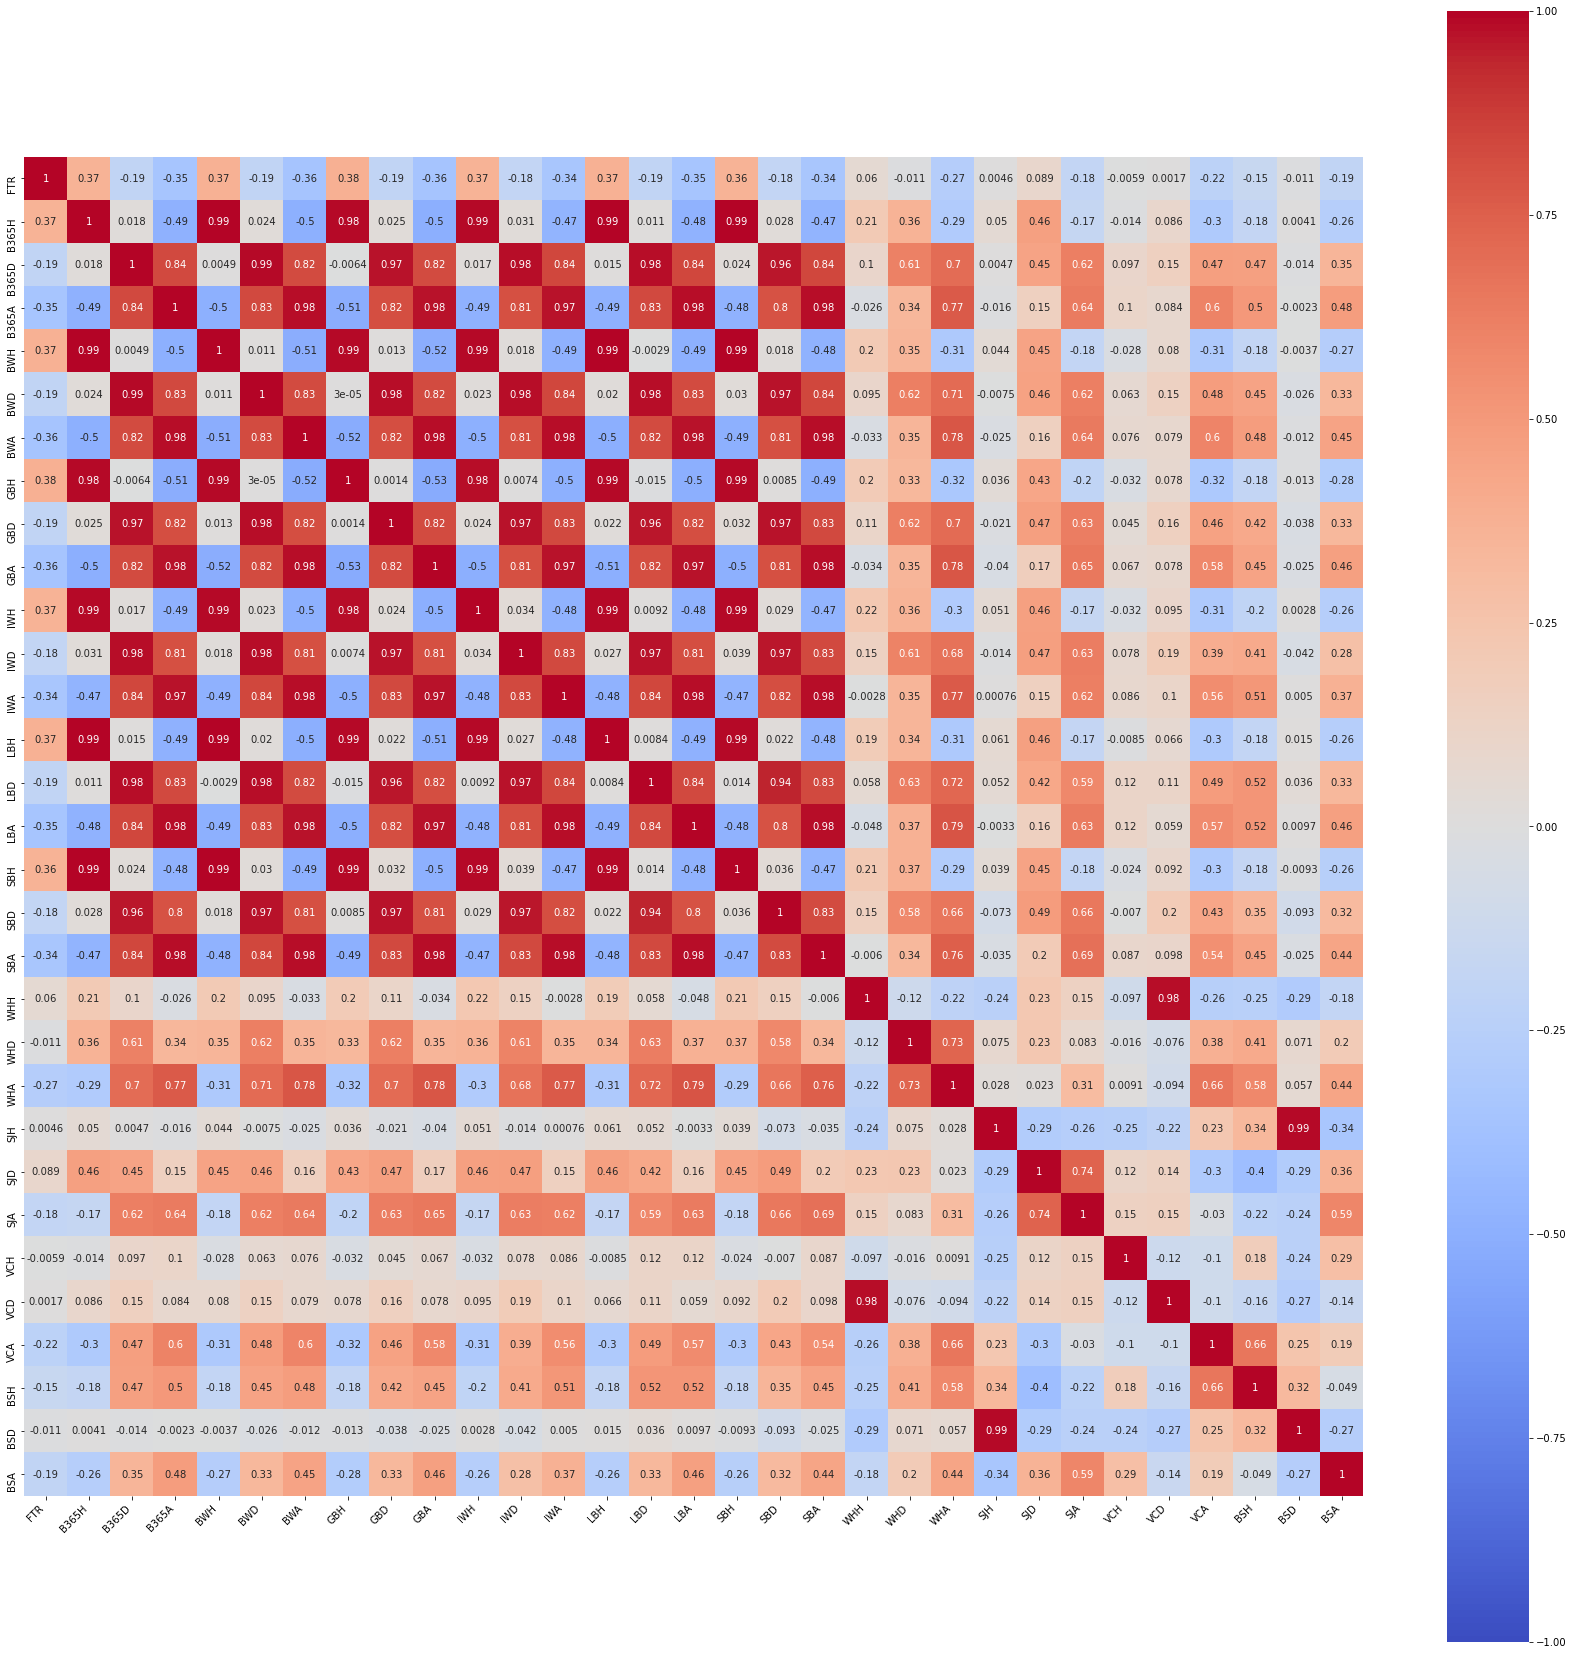

In [132]:
#Looking at the corr. of FTR and other features
fig, ax = plt.subplots(figsize=(30, 30))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#None of the odds values stand out among from others

In [133]:
#Getting the best feature from SelectFromModel
#and seeing differences from different Model

X = df.drop(columns=['FTR'])
y = df.FTR

sfm_selector_efc = SelectFromModel(estimator=RandomForestClassifier())
sfm_selector_efc.fit(X, y)
selected_columns_efc = X.columns[sfm_selector.get_support()]
print(selected_columns_efc)

sfm_selector_etr = SelectFromModel(estimator=ExtraTreesRegressor())
sfm_selector_etr.fit(X, y)
selected_columns_etr = X.columns[sfm_selector.get_support()]
print(selected_columns_etr)

sfm_selector_xgb = SelectFromModel(estimator=xgb.XGBClassifier())
sfm_selector_xgb.fit(X, y)
selected_columns_xgb = X.columns[sfm_selector.get_support()]
print(selected_columns_etr)

Index(['B365H', 'BWA', 'GBA', 'IWH', 'IWA', 'LBH', 'LBD', 'LBA', 'SBA', 'VCD',
       'VCA', 'BSH', 'BSD', 'BSA'],
      dtype='object')
Index(['B365H', 'BWA', 'GBA', 'IWH', 'IWA', 'LBH', 'LBD', 'LBA', 'SBA', 'VCD',
       'VCA', 'BSH', 'BSD', 'BSA'],
      dtype='object')
[17:23:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Index(['B365H', 'BWA', 'GBA', 'IWH', 'IWA', 'LBH', 'LBD', 'LBA', 'SBA', 'VCD',
       'VCA', 'BSH', 'BSD', 'BSA'],
      dtype='object')


# Train Model

In [186]:
clf = lgb.LGBMClassifier()
clf1 = RandomForestClassifier()
clf2 = ComplementNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()
clf5 = KNeighborsClassifier()

In [261]:
X = df.iloc[:, 1:]
y = df.FTR

In [264]:
#Compare the performance of differents models to Light GBM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

y_pred_lgbm = clf.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred_lgbm,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print (scores)
print ('LightGBM=', scores.mean())

y_pred_svc = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred_svc,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print (scores)
print ('LinearSVC=', scores.mean())

y_pred_xgb = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred_xgb,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print (scores)
print ('XGBClassifier=', scores.mean())

y_pred_rf = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred_rf,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print (scores)
print ('RandomForestClassifier=', scores.mean())

y_pred_nb = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred_nb,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print (scores)
print ('NaviesBayes=', scores.mean())

y_pred_knn = clf5.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred_knn,y_train)
scores = cross_val_score(clf5, X_train, y_train, cv=10)
print (scores)
print ('knn=', scores.mean())

[0.52631579 0.55465587 0.50202429 0.44715447 0.45528455 0.5
 0.46341463 0.46747967 0.54471545 0.54065041]
LightGBM= 0.5001695138408875
[0.55870445 0.52631579 0.51012146 0.45934959 0.47154472 0.49186992
 0.43902439 0.50813008 0.54065041 0.54471545]
LinearSVC= 0.5050426253250386
[19:48:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:48:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective '

**Will try to use rf, nb and Light gbm to construct the models**

# RandomForestClassifier (Untuned)

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

result_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy is: ', result_rfc*100)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
#Not looking good

Accuracy is:  51.461038961038966
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       280
           1       0.33      0.19      0.24       149
           2       0.52      0.45      0.49       187

    accuracy                           0.51       616
   macro avg       0.47      0.46      0.45       616
weighted avg       0.49      0.51      0.49       616

[[203  35  42]
 [ 84  29  36]
 [ 78  24  85]]


In [266]:
# Perform SMOTETomek 

from imblearn.combine import SMOTETomek 
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [267]:
rfc = RandomForestClassifier()
rfc.fit(X_res, y_res)
y_pred_rfc = rfc.predict(X_test)

result_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy is: ', result_rfc*100)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))
#Not looking good

Accuracy is:  50.0
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       280
           1       0.29      0.25      0.27       149
           2       0.49      0.45      0.47       187

    accuracy                           0.50       616
   macro avg       0.46      0.46      0.45       616
weighted avg       0.49      0.50      0.49       616

[[186  48  46]
 [ 71  37  41]
 [ 59  43  85]]


# Naive Bayes Classifiers (Untuned)

In [268]:
from sklearn.naive_bayes import ComplementNB
nb = ComplementNB()
y_pred_nb = nb.fit(X_train, y_train).predict(X_test)

result_nb = accuracy_score(y_test, y_pred_nb)
print('Accuracy is: ', result_nb*100)

print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
#Not looking good as well

Accuracy is:  50.81168831168831
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       280
           1       0.00      0.00      0.00       149
           2       0.44      0.68      0.53       187

    accuracy                           0.51       616
   macro avg       0.34      0.45      0.38       616
weighted avg       0.39      0.51      0.44       616

[[185   0  95]
 [ 78   0  71]
 [ 59   0 128]]


# Light GBM (Untuned)

In [269]:
lgbm = lgb.LGBMClassifier()
y_pred_lgbm = lgbm.fit(X_train, y_train).predict(X_test)

result_lgbm = accuracy_score(y_test, y_pred_lgbm)
print('Accuracy is: ', result_lgbm*100)

print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))
#Not looking good as well

Accuracy is:  52.75974025974026
              precision    recall  f1-score   support

           0       0.57      0.74      0.64       280
           1       0.35      0.22      0.27       149
           2       0.53      0.46      0.49       187

    accuracy                           0.53       616
   macro avg       0.48      0.47      0.47       616
weighted avg       0.51      0.53      0.51       616

[[206  34  40]
 [ 79  33  37]
 [ 74  27  86]]


In [270]:
# Perform SMOTETomek 

from imblearn.combine import SMOTETomek 
smt_lgbm = SMOTETomek(random_state=42)
X_res, y_res = smt_lgbm.fit_resample(X_train, y_train)

In [271]:
lgbm = lgb.LGBMClassifier()
y_pred_lgbm = lgbm.fit(X_res, y_res).predict(X_test)

result_lgbm = accuracy_score(y_test, y_pred_lgbm)
print('Accuracy is: ', result_lgbm*100)

print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))
#Not looking good as well

Accuracy is:  48.37662337662338
              precision    recall  f1-score   support

           0       0.58      0.63      0.60       280
           1       0.27      0.23      0.25       149
           2       0.47      0.47      0.47       187

    accuracy                           0.48       616
   macro avg       0.44      0.44      0.44       616
weighted avg       0.47      0.48      0.48       616

[[176  53  51]
 [ 66  34  49]
 [ 61  38  88]]


# Light GBM (tuned)

In [272]:
import numpy as np
import optuna
import lightgbm as lgb
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

def objective(trial):
   
    dtrain = lgb.Dataset(X_train, label=y_train)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
    return accuracy

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=500)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-09-25 19:49:56,294] A new study created in memory with name: no-name-fdbf993e-8fd7-464f-a0c7-66a5cdaf0521
[I 2021-09-25 19:49:56,733] Trial 0 finished with value: 0.413961038961039 and parameters: {'lambda_l1': 2.042263654719142e-07, 'lambda_l2': 1.1642256101692165e-05, 'num_leaves': 214, 'feature_fraction': 0.6952207969589357, 'bagging_fraction': 0.8708441708926956, 'bagging_freq': 3, 'min_child_samples': 8}. Best is trial 0 with value: 0.413961038961039.
[I 2021-09-25 19:49:56,868] Trial 1 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 0.00034519680330459215, 'lambda_l2': 0.0023380882743469, 'num_leaves': 186, 'feature_fraction': 0.739997826794061, 'bagging_fraction': 0.7254955986619219, 'bagging_freq': 3, 'min_child_samples': 42}. Best is trial 1 with value: 0.42694805194805197.
[I 2021-09-25 19:49:56,980] Trial 2 finished with value: 0.42207792207792205 and parameters: {'lambda_l1': 0.23397628725577277, 'lambda_l2': 0.008218817273922593, 'num_leaves'

[I 2021-09-25 19:49:59,029] Trial 22 finished with value: 0.43506493506493504 and parameters: {'lambda_l1': 0.01514220855809986, 'lambda_l2': 0.746391401817796, 'num_leaves': 35, 'feature_fraction': 0.952326759474784, 'bagging_fraction': 0.4732718255362597, 'bagging_freq': 4, 'min_child_samples': 61}. Best is trial 10 with value: 0.44155844155844154.
[I 2021-09-25 19:49:59,087] Trial 23 finished with value: 0.42857142857142855 and parameters: {'lambda_l1': 0.0015190562999570203, 'lambda_l2': 0.08555450994185995, 'num_leaves': 5, 'feature_fraction': 0.8680107362264848, 'bagging_fraction': 0.6414787667794454, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 10 with value: 0.44155844155844154.
[I 2021-09-25 19:49:59,165] Trial 24 finished with value: 0.4318181818181818 and parameters: {'lambda_l1': 0.02389987528152214, 'lambda_l2': 0.0025973182161976617, 'num_leaves': 32, 'feature_fraction': 0.8100675109609791, 'bagging_fraction': 0.5194326381889556, 'bagging_freq': 4, 'min_chil

[I 2021-09-25 19:50:01,074] Trial 45 finished with value: 0.43993506493506496 and parameters: {'lambda_l1': 0.5225926442354403, 'lambda_l2': 9.626274638904064e-08, 'num_leaves': 2, 'feature_fraction': 0.7224311657035397, 'bagging_fraction': 0.8934272635071973, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 39 with value: 0.44642857142857145.
[I 2021-09-25 19:50:01,195] Trial 46 finished with value: 0.41883116883116883 and parameters: {'lambda_l1': 0.04505598593274572, 'lambda_l2': 0.0001060589226494126, 'num_leaves': 46, 'feature_fraction': 0.7474307326408968, 'bagging_fraction': 0.8257476407885146, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 39 with value: 0.44642857142857145.
[I 2021-09-25 19:50:01,294] Trial 47 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 1.0442433417733552, 'lambda_l2': 0.014259824832262328, 'num_leaves': 24, 'feature_fraction': 0.7671488631278981, 'bagging_fraction': 0.9625726876220836, 'bagging_freq': 2, 'min_c

[I 2021-09-25 19:50:03,137] Trial 68 finished with value: 0.4172077922077922 and parameters: {'lambda_l1': 1.8620520142776362e-05, 'lambda_l2': 6.95220092309284e-05, 'num_leaves': 23, 'feature_fraction': 0.5801190161961207, 'bagging_fraction': 0.8145944736494649, 'bagging_freq': 1, 'min_child_samples': 51}. Best is trial 39 with value: 0.44642857142857145.
[I 2021-09-25 19:50:03,219] Trial 69 finished with value: 0.4237012987012987 and parameters: {'lambda_l1': 0.2670091411621922, 'lambda_l2': 0.03236651888536492, 'num_leaves': 17, 'feature_fraction': 0.7934354526149396, 'bagging_fraction': 0.5442727523359946, 'bagging_freq': 5, 'min_child_samples': 44}. Best is trial 39 with value: 0.44642857142857145.
[I 2021-09-25 19:50:03,278] Trial 70 finished with value: 0.4383116883116883 and parameters: {'lambda_l1': 3.27775855539798e-07, 'lambda_l2': 0.0013520016350829487, 'num_leaves': 8, 'feature_fraction': 0.979752600739246, 'bagging_fraction': 0.8425292612554317, 'bagging_freq': 5, 'min_ch

[I 2021-09-25 19:50:04,758] Trial 91 finished with value: 0.44805194805194803 and parameters: {'lambda_l1': 5.900725487964708, 'lambda_l2': 1.7261340994015664e-08, 'num_leaves': 2, 'feature_fraction': 0.7102207106052565, 'bagging_fraction': 0.8379809430154328, 'bagging_freq': 4, 'min_child_samples': 25}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:04,821] Trial 92 finished with value: 0.4237012987012987 and parameters: {'lambda_l1': 6.432976119503888, 'lambda_l2': 1.0409708363579795e-08, 'num_leaves': 10, 'feature_fraction': 0.7297938234744572, 'bagging_fraction': 0.8321164027514635, 'bagging_freq': 4, 'min_child_samples': 18}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:04,900] Trial 93 finished with value: 0.4237012987012987 and parameters: {'lambda_l1': 1.063299299433536, 'lambda_l2': 6.622862688523549e-08, 'num_leaves': 14, 'feature_fraction': 0.6890077966906417, 'bagging_fraction': 0.6286946086228308, 'bagging_freq': 5, 'min_chil

[I 2021-09-25 19:50:06,395] Trial 114 finished with value: 0.44642857142857145 and parameters: {'lambda_l1': 9.937065618546992, 'lambda_l2': 7.052645226150062e-08, 'num_leaves': 2, 'feature_fraction': 0.813006268491134, 'bagging_fraction': 0.8001356203496406, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:06,465] Trial 115 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 9.951076441251226, 'lambda_l2': 5.084795031619391e-08, 'num_leaves': 18, 'feature_fraction': 0.8194650942129336, 'bagging_fraction': 0.7681450850854573, 'bagging_freq': 7, 'min_child_samples': 14}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:06,532] Trial 116 finished with value: 0.4172077922077922 and parameters: {'lambda_l1': 0.6925988874565091, 'lambda_l2': 0.43572826630490447, 'num_leaves': 13, 'feature_fraction': 0.77110563871055, 'bagging_fraction': 0.7209894422046877, 'bagging_freq': 3, 'min_child_

[I 2021-09-25 19:50:08,402] Trial 137 finished with value: 0.43993506493506496 and parameters: {'lambda_l1': 3.32171327062524, 'lambda_l2': 1.3343282138397623e-08, 'num_leaves': 135, 'feature_fraction': 0.7725292190272864, 'bagging_fraction': 0.795752617485654, 'bagging_freq': 5, 'min_child_samples': 88}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:08,533] Trial 138 finished with value: 0.4366883116883117 and parameters: {'lambda_l1': 0.012340884540782002, 'lambda_l2': 0.059494381726195374, 'num_leaves': 14, 'feature_fraction': 0.9060736213274966, 'bagging_fraction': 0.7546568670046317, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:08,598] Trial 139 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 2.09644719421805, 'lambda_l2': 1.9379726656919057e-08, 'num_leaves': 8, 'feature_fraction': 0.493934903110422, 'bagging_fraction': 0.922347599199945, 'bagging_freq': 5, 'min_ch

[I 2021-09-25 19:50:10,296] Trial 160 finished with value: 0.42207792207792205 and parameters: {'lambda_l1': 0.0014135006339560856, 'lambda_l2': 2.416640482602574e-06, 'num_leaves': 20, 'feature_fraction': 0.5985130255978394, 'bagging_fraction': 0.7204174937132474, 'bagging_freq': 5, 'min_child_samples': 13}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:10,362] Trial 161 finished with value: 0.4448051948051948 and parameters: {'lambda_l1': 0.002793060879564652, 'lambda_l2': 2.028409502073184e-05, 'num_leaves': 2, 'feature_fraction': 0.6261262178926585, 'bagging_fraction': 0.7540651812598236, 'bagging_freq': 5, 'min_child_samples': 11}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:10,436] Trial 162 finished with value: 0.4383116883116883 and parameters: {'lambda_l1': 0.005630174645426017, 'lambda_l2': 4.08744989524164e-06, 'num_leaves': 6, 'feature_fraction': 0.6366445782561337, 'bagging_fraction': 0.7810689732439922, 'bagging_freq': 5, 

[I 2021-09-25 19:50:11,731] Trial 183 finished with value: 0.4431818181818182 and parameters: {'lambda_l1': 0.0018541025929579228, 'lambda_l2': 0.6064431980272664, 'num_leaves': 10, 'feature_fraction': 0.636585389734149, 'bagging_fraction': 0.7554653123270232, 'bagging_freq': 5, 'min_child_samples': 86}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:11,781] Trial 184 finished with value: 0.4512987012987013 and parameters: {'lambda_l1': 1.7574678357998954, 'lambda_l2': 0.17431383167866926, 'num_leaves': 2, 'feature_fraction': 0.5705395415961072, 'bagging_fraction': 0.7763348751162421, 'bagging_freq': 4, 'min_child_samples': 21}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:11,830] Trial 185 finished with value: 0.4496753246753247 and parameters: {'lambda_l1': 9.948712902355375e-05, 'lambda_l2': 0.2686489494139065, 'num_leaves': 2, 'feature_fraction': 0.7223015160060625, 'bagging_fraction': 0.7747313765216186, 'bagging_freq': 4, 'min_child

[I 2021-09-25 19:50:13,167] Trial 206 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 0.00010111646534768515, 'lambda_l2': 0.489801519497991, 'num_leaves': 7, 'feature_fraction': 0.500260412062427, 'bagging_fraction': 0.7677473212033376, 'bagging_freq': 4, 'min_child_samples': 89}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:13,241] Trial 207 finished with value: 0.43506493506493504 and parameters: {'lambda_l1': 0.0001328340548327583, 'lambda_l2': 0.07449076016516129, 'num_leaves': 16, 'feature_fraction': 0.519857978052314, 'bagging_fraction': 0.7589903686570428, 'bagging_freq': 4, 'min_child_samples': 94}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:13,311] Trial 208 finished with value: 0.43506493506493504 and parameters: {'lambda_l1': 1.7433270230688233e-05, 'lambda_l2': 0.23330553698571563, 'num_leaves': 11, 'feature_fraction': 0.545347890787313, 'bagging_fraction': 0.7846166257042058, 'bagging_freq': 4, 'mi

[I 2021-09-25 19:50:14,637] Trial 229 finished with value: 0.43506493506493504 and parameters: {'lambda_l1': 0.00019538795194522538, 'lambda_l2': 0.29904691865571514, 'num_leaves': 15, 'feature_fraction': 0.5282715878402643, 'bagging_fraction': 0.7324938970960961, 'bagging_freq': 4, 'min_child_samples': 92}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:14,687] Trial 230 finished with value: 0.4431818181818182 and parameters: {'lambda_l1': 0.000430152578814185, 'lambda_l2': 0.03990597793484794, 'num_leaves': 2, 'feature_fraction': 0.5514979600012322, 'bagging_fraction': 0.7116594469499105, 'bagging_freq': 4, 'min_child_samples': 89}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:14,736] Trial 231 finished with value: 0.4496753246753247 and parameters: {'lambda_l1': 1.3865235618811063e-05, 'lambda_l2': 0.17894610744264433, 'num_leaves': 2, 'feature_fraction': 0.5023280782664277, 'bagging_fraction': 0.7607848549253403, 'bagging_freq': 4, 'm

[I 2021-09-25 19:50:16,109] Trial 252 finished with value: 0.413961038961039 and parameters: {'lambda_l1': 5.9403923812466534e-05, 'lambda_l2': 0.12144402207657722, 'num_leaves': 89, 'feature_fraction': 0.5474704934646922, 'bagging_fraction': 0.8109964989827694, 'bagging_freq': 5, 'min_child_samples': 14}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:16,184] Trial 253 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 0.0006459684504591021, 'lambda_l2': 0.23998620679387617, 'num_leaves': 17, 'feature_fraction': 0.5273416266623657, 'bagging_fraction': 0.7310289521226973, 'bagging_freq': 5, 'min_child_samples': 93}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:16,255] Trial 254 finished with value: 0.4366883116883117 and parameters: {'lambda_l1': 4.4206758326791156e-05, 'lambda_l2': 0.868153561199044, 'num_leaves': 11, 'feature_fraction': 0.4802852993532157, 'bagging_fraction': 0.8171205280064222, 'bagging_freq': 5, 'm

[I 2021-09-25 19:50:17,681] Trial 275 finished with value: 0.43506493506493504 and parameters: {'lambda_l1': 2.1686446316809023e-07, 'lambda_l2': 0.02907037717653832, 'num_leaves': 50, 'feature_fraction': 0.7014191872256603, 'bagging_fraction': 0.67263197162091, 'bagging_freq': 4, 'min_child_samples': 63}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:17,751] Trial 276 finished with value: 0.4253246753246753 and parameters: {'lambda_l1': 3.3734647788289683e-05, 'lambda_l2': 0.21508441345404586, 'num_leaves': 8, 'feature_fraction': 0.6755516330903717, 'bagging_fraction': 0.7763782698686955, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:17,834] Trial 277 finished with value: 0.43344155844155846 and parameters: {'lambda_l1': 2.8170093997390364e-06, 'lambda_l2': 0.10290146256349596, 'num_leaves': 19, 'feature_fraction': 0.42509359297211397, 'bagging_fraction': 0.763435902215703, 'bagging_freq': 5, 

[I 2021-09-25 19:50:19,347] Trial 298 finished with value: 0.42207792207792205 and parameters: {'lambda_l1': 1.342040654982104e-06, 'lambda_l2': 0.03526285724220508, 'num_leaves': 6, 'feature_fraction': 0.4856244411432111, 'bagging_fraction': 0.7441226613798209, 'bagging_freq': 4, 'min_child_samples': 63}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:19,402] Trial 299 finished with value: 0.4448051948051948 and parameters: {'lambda_l1': 3.936826935534975e-06, 'lambda_l2': 0.05925337147013263, 'num_leaves': 2, 'feature_fraction': 0.6504463524702727, 'bagging_fraction': 0.6710047406565806, 'bagging_freq': 3, 'min_child_samples': 71}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:19,471] Trial 300 finished with value: 0.41883116883116883 and parameters: {'lambda_l1': 1.4307222866823228, 'lambda_l2': 0.10830473964926765, 'num_leaves': 10, 'feature_fraction': 0.5987358048677375, 'bagging_fraction': 0.6298159823798911, 'bagging_freq': 4, 'min_

[I 2021-09-25 19:50:21,001] Trial 321 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 2.9314961016020504, 'lambda_l2': 0.031096323143669124, 'num_leaves': 17, 'feature_fraction': 0.6473803594202814, 'bagging_fraction': 0.6194092329343382, 'bagging_freq': 3, 'min_child_samples': 12}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:21,088] Trial 322 finished with value: 0.42857142857142855 and parameters: {'lambda_l1': 2.2463735552265307, 'lambda_l2': 0.039596897884242546, 'num_leaves': 161, 'feature_fraction': 0.6235793131621122, 'bagging_fraction': 0.6741293608953997, 'bagging_freq': 3, 'min_child_samples': 70}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:21,146] Trial 323 finished with value: 0.4496753246753247 and parameters: {'lambda_l1': 0.02281932766024088, 'lambda_l2': 0.1348788023459259, 'num_leaves': 2, 'feature_fraction': 0.6089564174141116, 'bagging_fraction': 0.6586932717608455, 'bagging_freq': 3, 'min_ch

[I 2021-09-25 19:50:23,425] Trial 344 finished with value: 0.4253246753246753 and parameters: {'lambda_l1': 0.002198770568451617, 'lambda_l2': 1.3519331285403849e-08, 'num_leaves': 7, 'feature_fraction': 0.585441259067185, 'bagging_fraction': 0.6979692894846029, 'bagging_freq': 4, 'min_child_samples': 14}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:23,519] Trial 345 finished with value: 0.4237012987012987 and parameters: {'lambda_l1': 5.138068145803101e-07, 'lambda_l2': 0.05729828719868547, 'num_leaves': 11, 'feature_fraction': 0.7178783597188257, 'bagging_fraction': 0.7732407550695668, 'bagging_freq': 4, 'min_child_samples': 59}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:23,590] Trial 346 finished with value: 0.44805194805194803 and parameters: {'lambda_l1': 0.00016257719496644686, 'lambda_l2': 0.010500206264095768, 'num_leaves': 2, 'feature_fraction': 0.7091121399059558, 'bagging_fraction': 0.6172603233540775, 'bagging_freq': 3, 

[I 2021-09-25 19:50:25,487] Trial 367 finished with value: 0.4512987012987013 and parameters: {'lambda_l1': 0.03107743864594533, 'lambda_l2': 0.06546009862848975, 'num_leaves': 2, 'feature_fraction': 0.6224561247615192, 'bagging_fraction': 0.6272828920378312, 'bagging_freq': 5, 'min_child_samples': 16}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:25,616] Trial 368 finished with value: 0.4074675324675325 and parameters: {'lambda_l1': 0.030526907178083058, 'lambda_l2': 0.006347573174770072, 'num_leaves': 15, 'feature_fraction': 0.5534204188199964, 'bagging_fraction': 0.6291289014731202, 'bagging_freq': 4, 'min_child_samples': 20}. Best is trial 74 with value: 0.45292207792207795.
[I 2021-09-25 19:50:25,734] Trial 369 finished with value: 0.43344155844155846 and parameters: {'lambda_l1': 0.011445676800955389, 'lambda_l2': 1.90881140913924e-05, 'num_leaves': 7, 'feature_fraction': 0.6449259359706087, 'bagging_fraction': 0.5808192819869734, 'bagging_freq': 5, 'min_

[I 2021-09-25 19:50:27,806] Trial 390 finished with value: 0.4496753246753247 and parameters: {'lambda_l1': 0.01323267184654756, 'lambda_l2': 0.8976747469892561, 'num_leaves': 2, 'feature_fraction': 0.6189895516949158, 'bagging_fraction': 0.5829092743044761, 'bagging_freq': 3, 'min_child_samples': 8}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:28,012] Trial 391 finished with value: 0.413961038961039 and parameters: {'lambda_l1': 0.0032136899142660045, 'lambda_l2': 1.5151538110021252e-06, 'num_leaves': 11, 'feature_fraction': 0.5849961274848542, 'bagging_fraction': 0.5907865896218791, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:28,124] Trial 392 finished with value: 0.41883116883116883 and parameters: {'lambda_l1': 0.011116673291860316, 'lambda_l2': 2.1870580984255388, 'num_leaves': 20, 'feature_fraction': 0.6218936524076364, 'bagging_fraction': 0.5808632156935819, 'bagging_freq': 3, 'min_c

[I 2021-09-25 19:50:30,035] Trial 413 finished with value: 0.4237012987012987 and parameters: {'lambda_l1': 0.054914304025070595, 'lambda_l2': 0.013088267925161818, 'num_leaves': 131, 'feature_fraction': 0.6060368980343906, 'bagging_fraction': 0.49238853783803266, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:30,282] Trial 414 finished with value: 0.4107142857142857 and parameters: {'lambda_l1': 0.04012130130891988, 'lambda_l2': 0.008414095268667009, 'num_leaves': 93, 'feature_fraction': 0.6092815354540446, 'bagging_fraction': 0.4754685409105761, 'bagging_freq': 3, 'min_child_samples': 7}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:30,467] Trial 415 finished with value: 0.413961038961039 and parameters: {'lambda_l1': 0.14281945124689258, 'lambda_l2': 0.00046381649241972444, 'num_leaves': 78, 'feature_fraction': 0.6220887813824617, 'bagging_fraction': 0.5279282824818636, 'bagging_freq': 3, 'mi

[I 2021-09-25 19:50:32,481] Trial 436 finished with value: 0.40584415584415584 and parameters: {'lambda_l1': 0.009362128256598995, 'lambda_l2': 0.014946106516587628, 'num_leaves': 14, 'feature_fraction': 0.6386213213838524, 'bagging_fraction': 0.5603143791914912, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:32,572] Trial 437 finished with value: 0.42857142857142855 and parameters: {'lambda_l1': 0.024082413323424347, 'lambda_l2': 0.020998486617039513, 'num_leaves': 7, 'feature_fraction': 0.6278074607087976, 'bagging_fraction': 0.5444341827165261, 'bagging_freq': 3, 'min_child_samples': 17}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:32,662] Trial 438 finished with value: 0.42694805194805197 and parameters: {'lambda_l1': 0.017279942538244723, 'lambda_l2': 0.03590841235338427, 'num_leaves': 10, 'feature_fraction': 0.5884406387336665, 'bagging_fraction': 0.534030558422837, 'bagging_freq': 3, 'm

[I 2021-09-25 19:50:34,924] Trial 459 finished with value: 0.44805194805194803 and parameters: {'lambda_l1': 0.09557530858108228, 'lambda_l2': 0.0019229782513296002, 'num_leaves': 2, 'feature_fraction': 0.6138043262182599, 'bagging_fraction': 0.529723154645809, 'bagging_freq': 3, 'min_child_samples': 9}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:35,010] Trial 460 finished with value: 0.41883116883116883 and parameters: {'lambda_l1': 0.027597229868260718, 'lambda_l2': 0.0009536572543233186, 'num_leaves': 11, 'feature_fraction': 0.48075574524078457, 'bagging_fraction': 0.569991528942587, 'bagging_freq': 3, 'min_child_samples': 14}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:35,101] Trial 461 finished with value: 0.41233766233766234 and parameters: {'lambda_l1': 0.21643264980416035, 'lambda_l2': 0.004780760354983663, 'num_leaves': 7, 'feature_fraction': 0.5860465154711996, 'bagging_fraction': 0.4403051859796448, 'bagging_freq': 3, 'mi

[I 2021-09-25 19:50:37,853] Trial 482 finished with value: 0.42045454545454547 and parameters: {'lambda_l1': 0.12304359720326577, 'lambda_l2': 1.9353893093787324, 'num_leaves': 17, 'feature_fraction': 0.6251342108521052, 'bagging_fraction': 0.5736338800820243, 'bagging_freq': 3, 'min_child_samples': 23}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:37,933] Trial 483 finished with value: 0.4253246753246753 and parameters: {'lambda_l1': 7.821062503182066e-08, 'lambda_l2': 1.1703620882461245, 'num_leaves': 7, 'feature_fraction': 0.5840353118267343, 'bagging_fraction': 0.5826096531634627, 'bagging_freq': 3, 'min_child_samples': 21}. Best is trial 385 with value: 0.4577922077922078.
[I 2021-09-25 19:50:38,005] Trial 484 finished with value: 0.45616883116883117 and parameters: {'lambda_l1': 0.08185954081682413, 'lambda_l2': 0.008450149027359955, 'num_leaves': 2, 'feature_fraction': 0.6005517765821635, 'bagging_fraction': 0.4790858511969548, 'bagging_freq': 3, 'min_ch

Number of finished trials: 500
Best trial:
  Value: 0.4577922077922078
  Params: 
    lambda_l1: 0.02352469769652075
    lambda_l2: 2.0095006646866187e-06
    num_leaves: 2
    feature_fraction: 0.6208212245114297
    bagging_fraction: 0.5661568047951482
    bagging_freq: 3
    min_child_samples: 9


In [273]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lgbm_tunned = lgb.LGBMClassifier(lambda_l1=0.02352469769652075, lambda_l2=2.0095006646866187e-06,
                         num_leaves=2,feature_fraction=0.6208212245114297,bagging_fraction=0.5661568047951482,
                         bagging_freq=3,min_child_samples=9)

y_pred_lgbm = lgbm_tunned.fit(X_train, y_train).predict(X_test)

result_lgbm = accuracy_score(y_test, y_pred_lgbm)
print('Accuracy is: ', result_lgbm*100)

print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l1 is set=0.02352469769652075, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02352469769652075
[LightGBM] [Warning] feature_fraction is set=0.6208212245114297, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6208212245114297
[LightGBM] [Warning] bagging_fraction is set=0.5661568047951482, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5661568047951482
[LightGBM] [Warning] lambda_l2 is set=2.0095006646866187e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0095006646866187e-06
Accuracy is:  53.896103896103895
              precision    recall  f1-score   support

           0       0.55      0.82      0.66       280
           1       0.24      0.05      0.09       149
           2       0.57      0.50      0.53       187

    accuracy                           0.54       616
   macro 

# RandomForestClassifier (tuned)

In [275]:
def objective(trial):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    max_depth = trial.suggest_int("max_depth", 2, 100, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100,1000)

    rf = sklearn.ensemble.RandomForestClassifier(criterion =criterion,
            max_depth=max_depth, 
            n_estimators=n_estimators
        )

    score = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-09-25 19:53:29,796] A new study created in memory with name: no-name-13c07d3e-19ae-44f6-ba2d-f7360fb4489f
[I 2021-09-25 19:53:34,643] Trial 0 finished with value: 0.5444565378716668 and parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 983}. Best is trial 0 with value: 0.5444565378716668.
[I 2021-09-25 19:53:36,755] Trial 1 finished with value: 0.5399849931562196 and parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 358}. Best is trial 0 with value: 0.5444565378716668.
[I 2021-09-25 19:53:40,878] Trial 2 finished with value: 0.5164374412506804 and parameters: {'criterion': 'gini', 'max_depth': 38, 'n_estimators': 715}. Best is trial 0 with value: 0.5444565378716668.
[I 2021-09-25 19:53:42,256] Trial 3 finished with value: 0.5253689869555895 and parameters: {'criterion': 'gini', 'max_depth': 38, 'n_estimators': 309}. Best is trial 0 with value: 0.5444565378716668.
[I 2021-09-25 19:53:43,888] Trial 4 finished with value: 0.5493246920298818 and 

[I 2021-09-25 19:54:55,663] Trial 38 finished with value: 0.5509449364270519 and parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 830}. Best is trial 12 with value: 0.5517554709015651.
[I 2021-09-25 19:54:59,629] Trial 39 finished with value: 0.526990880456472 and parameters: {'criterion': 'gini', 'max_depth': 14, 'n_estimators': 829}. Best is trial 12 with value: 0.5517554709015651.
[I 2021-09-25 19:55:04,871] Trial 40 finished with value: 0.5196820528043008 and parameters: {'criterion': 'entropy', 'max_depth': 23, 'n_estimators': 829}. Best is trial 12 with value: 0.5517554709015651.
[I 2021-09-25 19:55:08,079] Trial 41 finished with value: 0.5505351341545869 and parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 945}. Best is trial 12 with value: 0.5517554709015651.
[I 2021-09-25 19:55:10,344] Trial 42 finished with value: 0.5481002325236234 and parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 602}. Best is trial 12 with value: 0.5517

[I 2021-09-25 19:56:19,517] Trial 77 finished with value: 0.5477003248734313 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 725}. Best is trial 54 with value: 0.5533806626098715.
[I 2021-09-25 19:56:21,606] Trial 78 finished with value: 0.5517529972459968 and parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 683}. Best is trial 54 with value: 0.5533806626098715.
[I 2021-09-25 19:56:24,183] Trial 79 finished with value: 0.5444524151123863 and parameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 684}. Best is trial 54 with value: 0.5533806626098715.
[I 2021-09-25 19:56:25,711] Trial 80 finished with value: 0.5493230429261697 and parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 564}. Best is trial 54 with value: 0.5533806626098715.
[I 2021-09-25 19:56:27,513] Trial 81 finished with value: 0.5550033806626098 and parameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 624}. Best is trial 81 with value: 0.5550033

Accuracy: 0.5550033806626098
Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 624}


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc_tunned = RandomForestClassifier(criterion='gini',max_depth=6,n_estimators=624)

y_pred_rfc = rfc_tunned.fit(X_train, y_train).predict(X_test)

result_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy is: ', result_rfc*100)

print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Accuracy is:  52.27272727272727
              precision    recall  f1-score   support

           0       0.57      0.75      0.64       273
           1       0.26      0.13      0.17       154
           2       0.55      0.52      0.54       189

    accuracy                           0.52       616
   macro avg       0.46      0.47      0.45       616
weighted avg       0.48      0.52      0.49       616

[[204  29  40]
 [ 95  20  39]
 [ 62  29  98]]


# Validating the model on recent matches

In [299]:
df_recentmatches = pd.read_csv('recentmatches.csv')

In [222]:
#features = list(df_recentmatches.iloc[:,24:42].columns)

In [284]:
X = df_recentmatches[features]
y = df_recentmatches.FTR.replace({'H': 0, 'D': 1, 'A': 2})

In [300]:
y_pred_rfc = rfc_tunned.predict(X)

result_rfc = accuracy_score(y, y_pred_rfc)
print('Accuracy is: ', result_rfc*100)

print(classification_report(y, y_pred_rfc))
print(confusion_matrix(y, y_pred_rfc))

Accuracy is:  62.0
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        22
           1       0.50      0.36      0.42        11
           2       0.60      0.71      0.65        17

    accuracy                           0.62        50
   macro avg       0.59      0.58      0.58        50
weighted avg       0.61      0.62      0.61        50

[[15  3  4]
 [ 3  4  4]
 [ 4  1 12]]


In [301]:
y_pred_lgbm = lgbm_tunned.predict(X)

result_lgbm = accuracy_score(y, y_pred_lgbm)
print('Accuracy is: ', result_lgbm*100)

print(classification_report(y, y_pred_lgbm))
print(confusion_matrix(y, y_pred_lgbm))

Accuracy is:  62.0
              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.25      0.09      0.13        11
           2       0.63      0.71      0.67        17

    accuracy                           0.62        50
   macro avg       0.52      0.54      0.51        50
weighted avg       0.56      0.62      0.58        50

[[18  0  4]
 [ 7  1  3]
 [ 2  3 12]]


In [303]:
data = {'HomeTeam':df_recentmatches.HomeTeam, 'AwayTeam':df_recentmatches.AwayTeam, 'FTR':df_recentmatches.FTR}
prediction = pd.DataFrame(data=data)
prediction

,HomeTeam,AwayTeam,FTR
0,Brentford,Arsenal,H
1,Man United,Leeds,H
2,Burnley,Brighton,A
3,Chelsea,Crystal Palace,H
4,Everton,Southampton,H
5,Leicester,Wolves,H
6,Watford,Aston Villa,H
7,Norwich,Liverpool,A
8,Newcastle,West Ham,A
9,Tottenham,Man City,H


In [304]:
prediction['Res_rfc'] = y_pred_rfc
prediction['Res_lgbm'] = y_pred_lgbm

In [305]:
prediction.tail()

,HomeTeam,AwayTeam,FTR,Res_rfc,Res_lgbm
45,Norwich,Watford,A,0,0
46,Aston Villa,Everton,H,1,0
47,Brighton,Leicester,H,1,0
48,West Ham,Man United,A,2,2
49,Tottenham,Chelsea,A,2,2


In [306]:
def transformResultBack(row,col_name):
    if(row[col_name] == 0):
        return 'H'
    elif(row[col_name] == 2):
        return 'A'
    else:
        return 'D'

In [307]:
prediction["Res_rfc"] = prediction.apply(lambda row: transformResultBack(row,"Res_rfc"),axis=1)
prediction["Res_lgbm"] = prediction.apply(lambda row: transformResultBack(row,"Res_lgbm"),axis=1)

In [309]:
prediction.tail()

,HomeTeam,AwayTeam,FTR,Res_rfc,Res_lgbm
45,Norwich,Watford,A,H,H
46,Aston Villa,Everton,H,D,H
47,Brighton,Leicester,H,D,H
48,West Ham,Man United,A,A,A
49,Tottenham,Chelsea,A,A,A
